# Download Datasets from Kaggle

In [1]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          22976        641  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1248         29  1.0              
darshanprabhu09/stock-prices-for                                      Stock prices of Amazon , Microsoft , Google, Apple   85KB  2023-05-16 15:17:16           1187         33  1.0              
fatihb/coffee-quality-data-cqi

In [3]:
! kaggle datasets download -d williiiamr/capstone

 99% 787M/792M [00:11<00:00, 85.8MB/s]
100% 792M/792M [00:11<00:00, 73.6MB/s]


# Import Library

In [5]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
from glob import glob
import matplotlib.image as img
import zipfile
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
! pip install tensorflow===2.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 116.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 112.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting un

In [3]:
import tensorflow as tf
print(tf.__version__)

2.9.0


# Extract Zip File

In [5]:
local_zip = 'capstone.zip'
target_extraction = '/content/data/'
file_check = "dataset"

try:
    if os.path.exists(os.path.join(target_extraction, file_check)):
        print("File Already Extracted")
    else:
        zip_ref = zipfile.ZipFile(local_zip, 'r')
        zip_ref.extractall(target_extraction)

except FileNotFoundError:
    print('Zip File Not Found!')

# Check our Dataset

In [6]:
path = '/content/data/dataset/'
counter = 0
dir_names=['actinic_keratosis', 'basal_cell_carcinoma', 'benign_keratosis', 'dermatofibroma', 'melanoma', 'melanocytic_nevus','squamous_cell_carcinoma', 'vascular_lesions']

for file in (dir_names):
    dir = os.listdir(f"{path}/{file}")
    
    print(f"Data for {file} is {len(dir)}")

Data for actinic_keratosis is 300
Data for basal_cell_carcinoma is 300
Data for benign_keratosis is 300
Data for dermatofibroma is 141
Data for melanoma is 300
Data for melanocytic_nevus is 300
Data for squamous_cell_carcinoma is 300
Data for vascular_lesions is 179


# Dataset Augmentation

In [7]:
!pip install augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
dir_names=['actinic_keratosis', 'basal_cell_carcinoma', 'benign_keratosis', 'dermatofibroma', 'melanoma', 'melanocytic_nevus','squamous_cell_carcinoma', 'vascular_lesions']
import Augmentor
for i in dir_names:
    p = Augmentor.Pipeline(f"/content/data/dataset/{i}", output_directory=f'/content/data/final_dataset/{i}')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.5)
    p.flip_top_bottom(probability=0.5)
    p.zoom_random(probability=0.5, percentage_area=0.8)
    p.crop_random(probability=0.5, percentage_area=0.8)
    p.resize(probability=1.0, width=150, height=150)
    p.sample(800) 

Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/actinic_keratosis.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F441C0C75E0>: 100%|██████████| 800/800 [01:22<00:00,  9.66 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/basal_cell_carcinoma.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F449FBFF4F0>: 100%|██████████| 800/800 [01:40<00:00,  7.94 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/benign_keratosis.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F441DB67310>: 100%|██████████| 800/800 [00:47<00:00, 16.95 Samples/s]


Initialised with 141 image(s) found.
Output directory set to /content/data/final_dataset/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F441DD978E0>: 100%|██████████| 800/800 [00:57<00:00, 13.92 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/melanoma.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F441D9A6FE0>: 100%|██████████| 800/800 [01:18<00:00, 10.22 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/melanocytic_nevus.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F441C08B8E0>: 100%|██████████| 800/800 [01:06<00:00, 11.99 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/squamous_cell_carcinoma.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F441C0C48E0>: 100%|██████████| 800/800 [00:56<00:00, 14.05 Samples/s]


Initialised with 179 image(s) found.
Output directory set to /content/data/final_dataset/vascular_lesions.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F441C0C4E50>: 100%|██████████| 800/800 [00:51<00:00, 15.68 Samples/s]


# Check Total Data

In [9]:
output_dir = pathlib.Path('/content/data/final_dataset/')
image_count_train = len(list(output_dir.glob('*/*.jpg')))
print(image_count_train)

6400


# Split Dataset Into Training and Validation

In [10]:
training_main = pathlib.Path('/content/data/final_dataset')

In [29]:
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  training_main,
  shuffle=True,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(150, 150),
  batch_size=batch_size)

Found 6400 files belonging to 8 classes.
Using 5120 files for training.


In [30]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  training_main,
  shuffle=True,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(150,150),
  batch_size=batch_size)

Found 6400 files belonging to 8 classes.
Using 1280 files for validation.


In [31]:
validation_size = int(0.5 * val_ds.cardinality().numpy())
test_ds = val_ds.take(validation_size)
val_ds = val_ds.skip(validation_size)

In [14]:
print("Training Set Size: %d" % train_ds.cardinality().numpy())
print("Validation Set Size: %d" % val_ds.cardinality().numpy())
print("Test Set Size: %d" % test_ds.cardinality().numpy())

Training Set Size: 160
Validation Set Size: 20
Test Set Size: 20


# Plot our Dataset (Each Class)

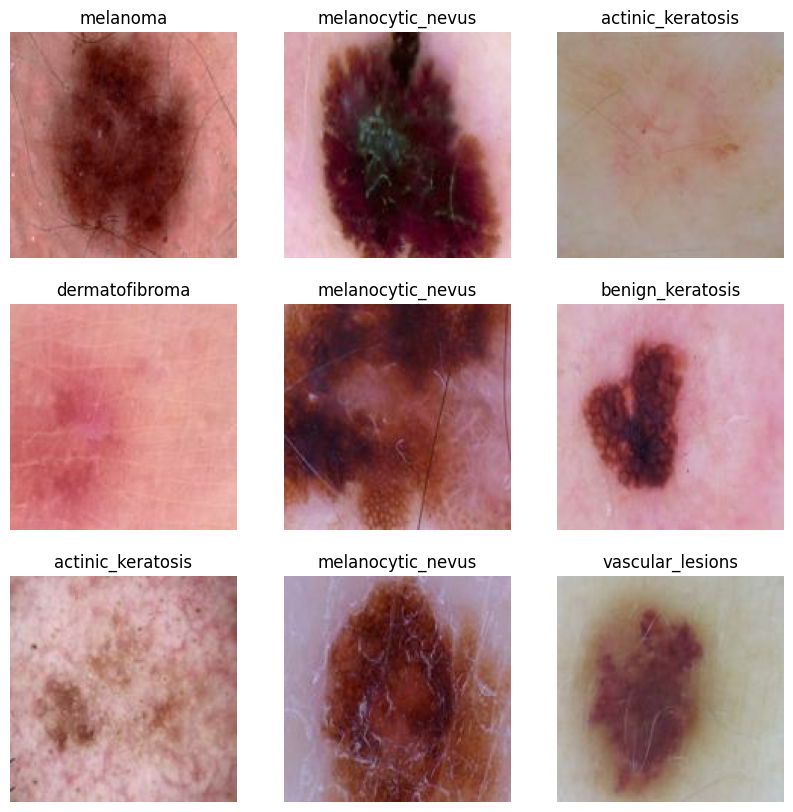

In [15]:
plt.figure(figsize=(10, 10))
for image, label in val_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(dir_names[label[i]])
        plt.axis("off")

# Parameter

In [17]:
IMG_SIZE = (150,150)
IMG_SHAPE = IMG_SIZE + (3,)

# Architecture using Transfer Learning (EfficientNetB5)

In [18]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Adamax
model_name='EfficientNetB5'
base_model=tf.keras.applications.EfficientNetB1(include_top=False, weights="imagenet",input_shape=IMG_SHAPE, pooling='max') 
x = base_model.output
x = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(64, kernel_regularizer = regularizers.l2(l = 0.050),activity_regularizer=regularizers.l1(0.06),
                bias_regularizer=regularizers.l1(0.06), activation='relu')(x)
x=Dropout(rate=0.3, seed=123)(x)      
output=Dense(8, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)

In [19]:
learning_rate = 0.001

model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adamax(learning_rate=learning_rate),
                  metrics=['accuracy'])

# Set Callbacks

In [20]:
es = EarlyStopping(monitor='accuracy', mode='max', patience=2,  restore_best_weights=True)

In [21]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('val_accuracy') is not None and logs.get('val_accuracy') >= 0.90:
                print("\nReached 90% accuracy so cancelling training!") 
                self.model.stop_training = True
                
callbacks = myCallback()

In [24]:
initial_epochs = 10
history = model.fit(train_ds, validation_data=val_ds, validation_steps=int(0.2*len(val_ds)), epochs=initial_epochs, callbacks=[callbacks])

Epoch 1/10
  6/160 [>.............................] - ETA: 33s - loss: 0.5065 - accuracy: 0.9792

160/160 [==============================] - 36s 226ms/step - loss: 0.4661 - accuracy: 0.9920 - val_loss: 0.7855 - val_accuracy: 0.8594
Epoch 2/10
160/160 [==============================] - ETA: 0s - loss: 0.4457 - accuracy: 0.9930
Reached 90% accuracy so cancelling training!
160/160 [==============================] - 36s 228ms/step - loss: 0.4457 - accuracy: 0.9930 - val_loss: 0.6580 - val_accuracy: 0.9219


# Save Model

In [25]:
model.save('./model_weights/skin_model(val acc > 92).h5')

# Plot Training and Validation

Text(0.5, 1.0, 'Training vs Validation Loss')

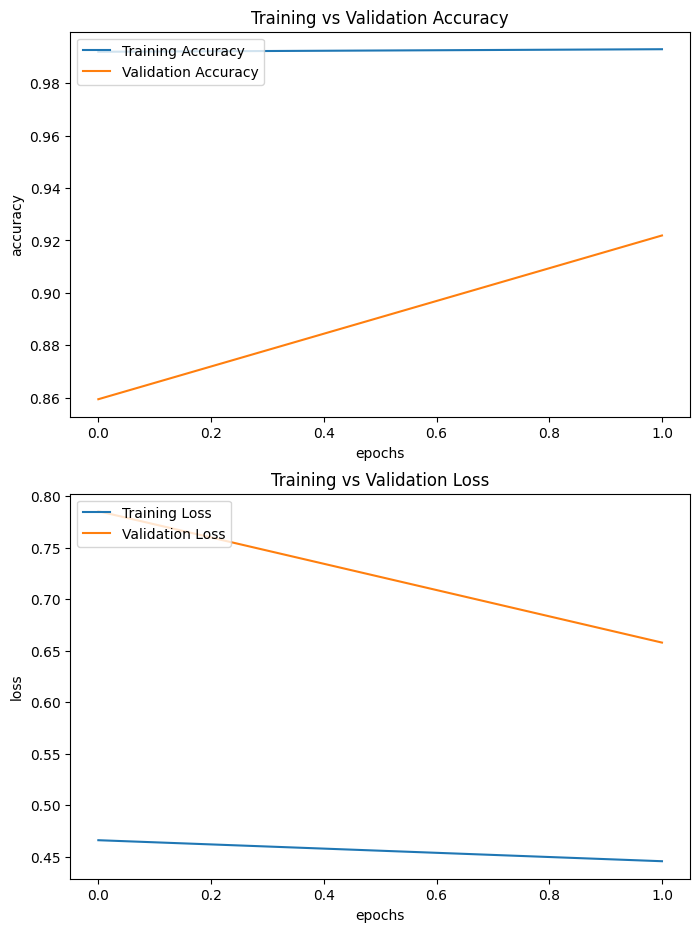

In [26]:

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 11))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.title('Training vs Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.title('Training vs Validation Loss')

# Evaluate Model

In [27]:
model.evaluate(test_ds)

20/20 [==============================] - 2s 81ms/step - loss: 0.8073 - accuracy: 0.8594


[0.8072915077209473, 0.859375]

# Load and Test Model

In [32]:
print(train_ds.class_names)
label = train_ds.class_names

['actinic_keratosis', 'basal_cell_carcinoma', 'benign_keratosis', 'dermatofibroma', 'melanocytic_nevus', 'melanoma', 'squamous_cell_carcinoma', 'vascular_lesions']


In [33]:
from tensorflow.keras.models import load_model
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

In [38]:
model = load_model('/content/model_weights/model_val_92.h5')

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 150, 150, 3)  0           ['normalization[0][0]']      

In [40]:
model.evaluate(test_ds)

20/20 [==============================] - 4s 50ms/step - loss: 0.8183 - accuracy: 0.8562


[0.8183168172836304, 0.856249988079071]

In [48]:
uploaded=files.upload()

for fn in uploaded.keys():
 
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))
  
  x=img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  result = classes[0]
  predicted_label = np.argmax(result)
  print(f'{label[predicted_label]} have {round(result[predicted_label] * 100)}% accuracy')
  
  name = list(uploaded.keys())
  
  !rm '{name[0]}'

Saving download (2).jpeg to download (2).jpeg
1/1 [==============================] - 0s 54ms/step
[0.542276   0.04267091 0.09974078 0.03856044 0.12209255 0.07366036
 0.04641271 0.03458625]
actinic_keratosis have 54% accuracy
